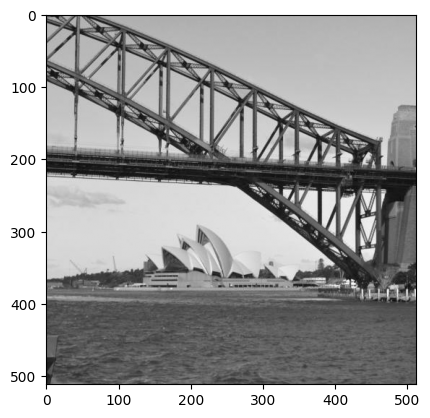

In [420]:
from IPython.display import Audio
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f = np.array(plt.imread('operahall.png'), dtype=float)
plt.imshow(f,cmap='gray')

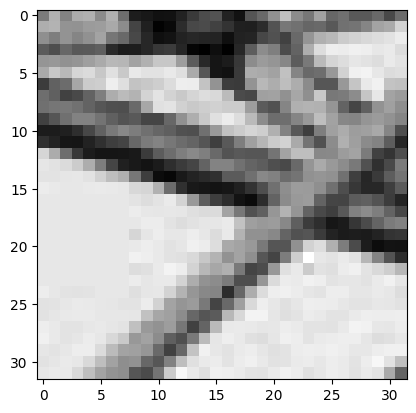

In [421]:
top_left = f[:32, :32]
plt.imshow(top_left, cmap='gray')

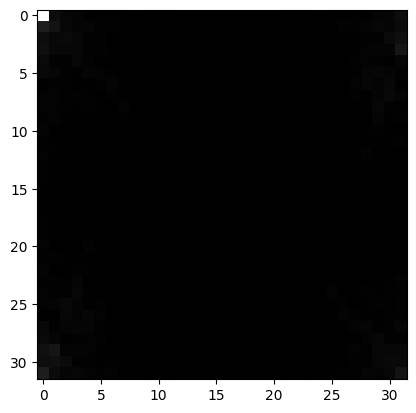

In [422]:
F = scipy.fft.fft2(top_left)
plt.imshow(np.abs(F), cmap='gray')

The top left pixel of the sub-block FFT is the brightest. This pixel represents the average of the data in the sub-block (DC).

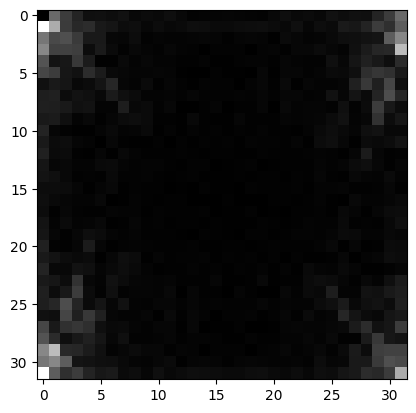

In [423]:
F[0][0] = 0
plt.imshow(np.abs(F), cmap='gray')

In [424]:
def Compress(X, tol):
    num_coeff = 0
    num_coeff_dropped = 0
    r, c = len(X), len(X[0])
    Y = np.zeros_like(X)
    for n in range(0, r, 32):
        for m in range(0, c, 32):
            F = scipy.fft.fft2(X[n:n + 32, m:m + 32])
            F_max = np.max(F)
            #print(n, m)
            for i in range(32):
                for j in range(32):
                    if F[i][j] != 0:
                        num_coeff += 1
                        if np.abs(F[i][j]) <= F_max * tol:
                            num_coeff_dropped += 1
                            F[i][j] = 0
            Y[n:n + 32, m:m + 32] = np.real(scipy.fft.ifft2(F))
    return (Y, num_coeff_dropped / num_coeff)


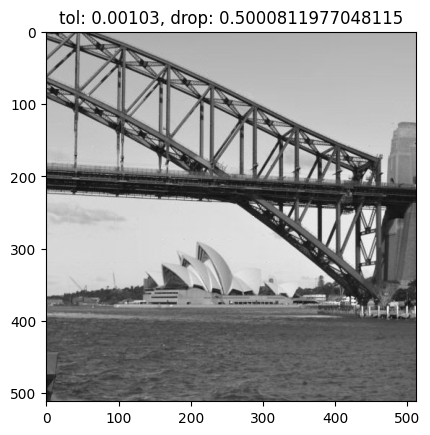

In [425]:
Y, drop = Compress(f, 0.00103)
plt.title(f'tol: 0.00103, drop: {drop}')
plt.imshow(Y,cmap='gray')

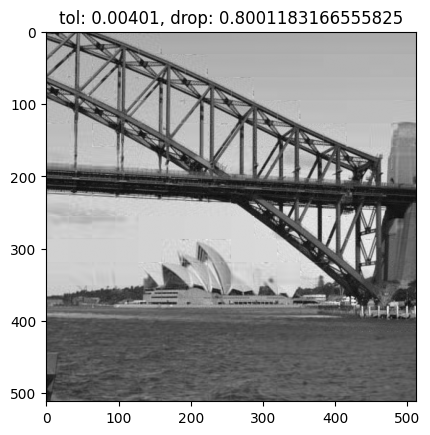

In [426]:
Y, drop = Compress(f, 0.00401)
plt.title(f'tol: 0.00401, drop: {drop}')
plt.imshow(Y,cmap='gray')

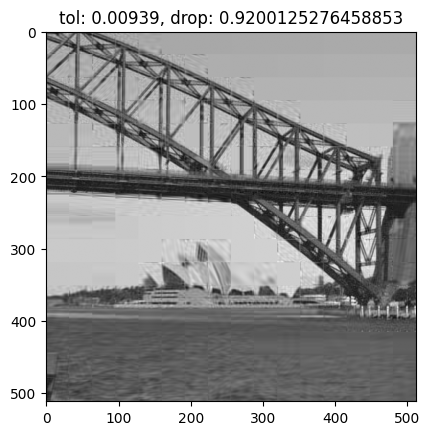

In [427]:
Y, drop = Compress(f, 0.00939)
plt.title(f'tol: 0.00939, drop: {drop}')
plt.imshow(Y,cmap='gray')

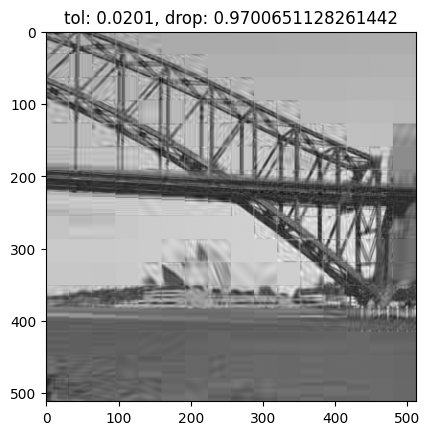

In [428]:
Y, drop = Compress(f, 0.0201)
plt.title(f'tol: 0.0201, drop: {drop}')
plt.imshow(Y,cmap='gray')

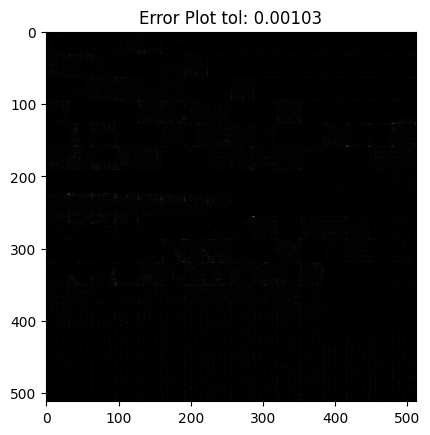

In [429]:
Y, drop = Compress(f, 0.00103)
plt.title(f'Error Plot tol: 0.00103')
plt.imshow(np.abs(Y - f),cmap='gray')